<a href="https://colab.research.google.com/github/yulmanperez/Pacific_Island_Case/blob/main/Tesla_YulmanPerezClaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Code To define the best alternative to power an island in the Pacific
## Yulman Perez

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from fbprophet import Prophet
from pandas import to_datetime
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from google.colab import drive
drive.mount('/content/drive/')

FOLDERNAME = 'Tesla_2022/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import the Excel file
file=('/content/drive/MyDrive/Tesla_2022/CaseStudyProjectData.xlsx')

Load_Data=pd.read_excel(file,'Load')
PV_Data=pd.read_excel(file,'PV')
PV_Data

,Hour,Production (kW)
0,2014-01-01 00:00:00.000,0.0
1,2014-01-01 00:05:00.000,0.0
2,2014-01-01 00:10:00.000,0.0
3,2014-01-01 00:15:00.000,0.0
4,2014-01-01 00:20:00.000,0.0
...,...,...
105115,2014-12-31 23:34:59.971,0.0
105116,2014-12-31 23:39:59.971,0.0
105117,2014-12-31 23:44:59.971,0.0
105118,2014-12-31 23:49:59.971,0.0


In [ ]:
#from pandas.core.common import temp_setattr
# Data Visualization


#Load_Data.plot(x='Timestamp',y='Load kVA');

## PV 
#PV_Data.plot(x='Hour',y='Production (kW)');


In [ ]:
#df=PV_Data.rename(columns={'Timestamp':'ds', 'Load (kW)':'y'})
df=PV_Data.rename(columns={'Hour':'ds', 'Production (kW)':'y'})
df['ds']= to_datetime(df['ds'])
df

,ds,y
0,2014-01-01 00:00:00.000,0.0
1,2014-01-01 00:05:00.000,0.0
2,2014-01-01 00:10:00.000,0.0
3,2014-01-01 00:15:00.000,0.0
4,2014-01-01 00:20:00.000,0.0
...,...,...
105115,2014-12-31 23:34:59.971,0.0
105116,2014-12-31 23:39:59.971,0.0
105117,2014-12-31 23:44:59.971,0.0
105118,2014-12-31 23:49:59.971,0.0


In [ ]:
## Define Model
from fbprophet import Prophet
model = Prophet()
# fit the model

model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
validate = df[['ds','y']].tail(10)

df.drop(df[['ds','y']].tail(10).index,inplace=True)

train = df[['ds','y']]


m = Prophet()

m.fit(train)
p = 24
future = m.make_future_dataframe(periods=p, freq='H')
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#future = m.make_future_dataframe(periods=p,freq='Y',include_history=True)
#forecast = m.predict(future)
forecast


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00.000,17.895793,-15.662059,18.907747,17.895793,17.895793,-16.266899,-16.266899,-16.266899,-16.268304,-16.268304,-16.268304,0.001405,0.001405,0.001405,0.0,0.0,0.0,1.628894
1,2014-01-01 00:05:00.000,17.895352,-16.569193,20.778397,17.895352,17.895352,-16.251323,-16.251323,-16.251323,-16.252388,-16.252388,-16.252388,0.001065,0.001065,0.001065,0.0,0.0,0.0,1.644029
2,2014-01-01 00:10:00.000,17.894911,-15.805053,19.590293,17.894911,17.894911,-16.237165,-16.237165,-16.237165,-16.237872,-16.237872,-16.237872,0.000707,0.000707,0.000707,0.0,0.0,0.0,1.657746
3,2014-01-01 00:15:00.000,17.894470,-17.532739,19.660019,17.894470,17.894470,-16.224571,-16.224571,-16.224571,-16.224900,-16.224900,-16.224900,0.000330,0.000330,0.000330,0.0,0.0,0.0,1.669900
4,2014-01-01 00:20:00.000,17.894029,-16.187758,19.867726,17.894029,17.894029,-16.213653,-16.213653,-16.213653,-16.213588,-16.213588,-16.213588,-0.000065,-0.000065,-0.000065,0.0,0.0,0.0,1.680376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105099,2015-01-01 16:34:59.971,15.853448,-15.259214,21.251392,15.853448,15.853448,-12.825259,-12.825259,-12.825259,-12.730494,-12.730494,-12.730494,-0.094765,-0.094765,-0.094765,0.0,0.0,0.0,3.028189
105100,2015-01-01 17:34:59.971,15.852578,-18.155506,17.605889,15.852578,15.852578,-15.813786,-15.813786,-15.813786,-15.729798,-15.729798,-15.729798,-0.083988,-0.083988,-0.083988,0.0,0.0,0.0,0.038791
105101,2015-01-01 18:34:59.971,15.851708,-19.821771,17.618971,15.851708,15.851708,-16.442422,-16.442422,-16.442422,-16.367302,-16.367302,-16.367302,-0.075120,-0.075120,-0.075120,0.0,0.0,0.0,-0.590714
105102,2015-01-01 19:34:59.971,15.850837,-17.762095,15.931686,15.850837,15.850837,-16.253750,-16.253750,-16.253750,-16.185382,-16.185382,-16.185382,-0.068368,-0.068368,-0.068368,0.0,0.0,0.0,-0.402913


In [ ]:

p = 24
future = m.make_future_dataframe(periods=p, freq='H')
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#future = m.make_future_dataframe(periods=p,freq='Y',include_history=True)
#forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00.000,17.895793,-15.539364,20.063530,17.895793,17.895793,-16.266899,-16.266899,-16.266899,-16.268304,-16.268304,-16.268304,0.001405,0.001405,0.001405,0.0,0.0,0.0,1.628894
1,2014-01-01 00:05:00.000,17.895352,-16.070114,18.839880,17.895352,17.895352,-16.251323,-16.251323,-16.251323,-16.252388,-16.252388,-16.252388,0.001065,0.001065,0.001065,0.0,0.0,0.0,1.644029
2,2014-01-01 00:10:00.000,17.894911,-16.554379,19.524327,17.894911,17.894911,-16.237165,-16.237165,-16.237165,-16.237872,-16.237872,-16.237872,0.000707,0.000707,0.000707,0.0,0.0,0.0,1.657746
3,2014-01-01 00:15:00.000,17.894470,-16.826574,19.697156,17.894470,17.894470,-16.224571,-16.224571,-16.224571,-16.224900,-16.224900,-16.224900,0.000330,0.000330,0.000330,0.0,0.0,0.0,1.669900
4,2014-01-01 00:20:00.000,17.894029,-15.599047,19.882762,17.894029,17.894029,-16.213653,-16.213653,-16.213653,-16.213588,-16.213588,-16.213588,-0.000065,-0.000065,-0.000065,0.0,0.0,0.0,1.680376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105099,2015-01-01 16:34:59.971,15.853448,-13.487138,20.403383,15.853448,15.853448,-12.825259,-12.825259,-12.825259,-12.730494,-12.730494,-12.730494,-0.094765,-0.094765,-0.094765,0.0,0.0,0.0,3.028189
105100,2015-01-01 17:34:59.971,15.852578,-17.127053,18.786350,15.852578,15.852578,-15.813786,-15.813786,-15.813786,-15.729798,-15.729798,-15.729798,-0.083988,-0.083988,-0.083988,0.0,0.0,0.0,0.038791
105101,2015-01-01 18:34:59.971,15.851708,-20.342624,16.254425,15.851708,15.851708,-16.442422,-16.442422,-16.442422,-16.367302,-16.367302,-16.367302,-0.075120,-0.075120,-0.075120,0.0,0.0,0.0,-0.590714
105102,2015-01-01 19:34:59.971,15.850837,-18.877823,18.748339,15.850837,15.850837,-16.253750,-16.253750,-16.253750,-16.185382,-16.185382,-16.185382,-0.068368,-0.068368,-0.068368,0.0,0.0,0.0,-0.402913


In [ ]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})


In [ ]:
#df.to_excel(r'/content/drive/MyDrive/Tesla_2022/Forecast_Load.xlsx', index = False)

In [ ]:
df.to_excel(r'/content/drive/MyDrive/Tesla_2022/Productio_PV.xlsx', index = False)

NameError: ignored

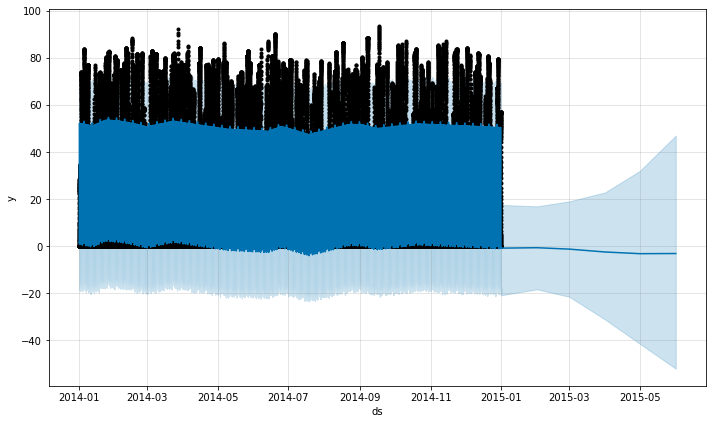

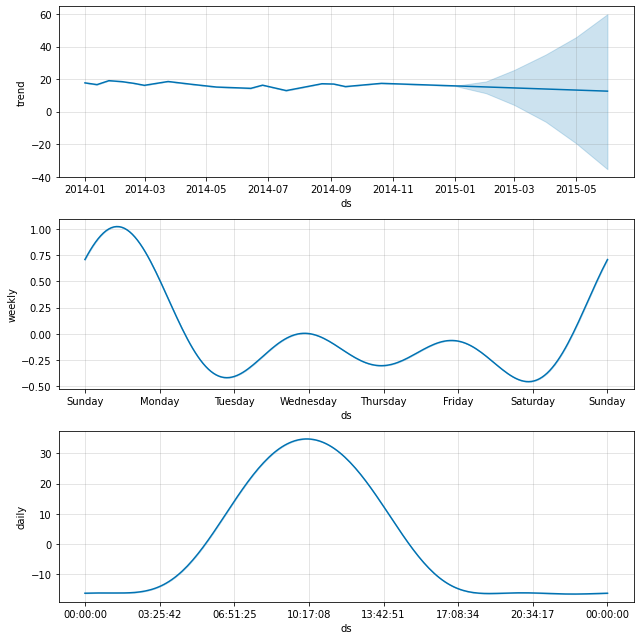

In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)